Deeper look to 'Province' Dataset
There are some redundant and not interesting variables, as well as fake records.

Removing Fake records, remembering Italy is above equator.


In [8]:
d1.shape


(14720, 12)

In [9]:
#Removing fake data
toremove = []
for row in d1.index:
    if d1['lat'][row] == 0:
        toremove.append(row) #saving fake rows
d1 = d1.drop(toremove) #dropping fake rows
d1 = d1.reset_index(drop = True) #updating indexes


In [10]:
d1.shape

(12305, 12)

Let's try to build some more interesting objects, like a MultiIndex DataFrame and a TimeSeries.

In [15]:
#Creating a list of unique 'province', 'regioni', lat' and 'long' 
row = 0
day0 = d1["data"][0]
column_prov = []
column_reg = []
column_lat = []
column_long = []
while d1["data"][row] == day0:
    column_prov.append(d1["sigla_provincia"][row])
    column_reg.append(d1["denominazione_regione"][row])
    column_lat.append(d1["lat"][row])
    column_long.append(d1["long"][row])
    row += 1

myMI = pd.DataFrame({'regioni':column_reg, 'province': column_prov, 
                     'lat':column_lat, 'long':column_long})

In [2]:
dates = []
for i in range(0, len(d1.index),len(column_prov)):
    dates.append(d1["data"][i])
    myMI[d1["data"][i]] = np.nan
dates_TS = pd.DatetimeIndex(dates)

myMI.set_index(['regioni', 'province'], inplace = True) 
myMI = myMI.sort_index()

In [3]:
myMI.iloc[20:30][dates[10:12]]


2020-03-05T17:00:00  2020-03-06T18:00:00
regioni               province                                          
Emilia-Romagna        PC                        NaN                  NaN
                      PR                        NaN                  NaN
                      RA                        NaN                  NaN
                      RE                        NaN                  NaN
                      RN                        NaN                  NaN
Friuli Venezia Giulia GO                        NaN                  NaN
                      PN                        NaN                  NaN
                      TS                        NaN                  NaN
                      UD                        NaN                  NaN
Lazio                 FR                        NaN                  NaN

In [5]:
myMI.loc[('Toscana', 'FI')][dates[80:85]]


2020-05-14T17:00:00   NaN
2020-05-15T17:00:00   NaN
2020-05-16T17:00:00   NaN
2020-05-17T17:00:00   NaN
2020-05-18T17:00:00   NaN
Name: (Toscana, FI), dtype: float64

With the objects created, we can define also the TimeSeries, myTS:

In [ ]:
#Creating a TimeSeries
dates_TS = pd.DatetimeIndex(dates)
myTS = pd.DataFrame(index = dates_TS, columns = column_prov)
dailyincr = pd.DataFrame(index = dates_TS[1:], columns = column_prov) #increment matrix


In [11]:
myTS.loc[myTS.index[:5]]


,CH,AQ,PE,TE,MT,PZ,BZ,CZ,CS,KR,...,PG,TR,AO,BL,PD,RO,TV,VE,VR,VI
2020-02-24 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-25 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-26 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-27 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-28 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now we have to fill all these DataFrames:

In [12]:
for r in d1.index:
    myTS[d1['sigla_provincia'][r]][d1['data'][r]] = d1['totale_casi'][r]
    myMI[d1['data'][r]][(d1['denominazione_regione'][r], d1['sigla_provincia'][r])] = d1['totale_casi'][r]

for i in range(1,len(myTS)):
    dailyincr.values[i-1] = myTS.values[i] - myTS.values[i-1]


In [14]:
myMI.loc['Calabria']


,lat,long,2020-02-24T18:00:00,2020-02-25T18:00:00,2020-02-26T18:00:00,2020-02-27T18:00:00,2020-02-28T18:00:00,2020-02-29T17:00:00,2020-03-01T17:00:00,2020-03-02T17:00:00,...,2020-06-08T17:00:00,2020-06-09T17:00:00,2020-06-10T17:00:00,2020-06-11T17:00:00,2020-06-12T17:00:00,2020-06-13T17:00:00,2020-06-14T17:00:00,2020-06-15T17:00:00,2020-06-16T17:00:00,2020-06-17T17:00:00
province,,,,,,,,,,,,,,,,,,,,,
CS,39.293087,16.256097,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,468.0,468.0,468.0,468.0,468.0,468.0,468.0,468.0,468.0,468.0
CZ,38.905976,16.594402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,214.0,214.0,214.0,214.0,214.0,214.0,214.0,214.0,214.0,214.0
KR,39.080369,17.125389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,118.0,118.0,118.0,118.0,118.0,118.0,118.0,118.0,118.0,118.0
RC,38.109228,15.643453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,276.0,276.0,276.0,277.0,277.0,277.0,277.0,277.0,277.0,277.0
VV,38.676241,16.101574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,81.0,81.0,81.0,82.0,82.0,83.0,83.0,83.0,83.0,83.0


In [13]:
myTS.values


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 7, 0, 0],
       [0, 0, 0, ..., 8, 0, 0],
       ..., 
       [828, 247, 1539, ..., 2678, 5110, 2855],
       [828, 247, 1540, ..., 2678, 5112, 2855],
       [829, 246, 1541, ..., 2679, 5113, 2855]], dtype=object)

In [15]:
dailyincr.values


array([[0, 0, 0, ..., 7, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 6, 0, 3],
       ..., 
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 2, 0],
       [1, -1, 1, ..., 1, 1, 0]], dtype=object)

Now we can do some operations on data exploting MultiIndex object

In [16]:
#Total cases by region at 2020-03-15T17:00:00
myMI.groupby('regioni')[dates[20]].sum()

regioni
Abruzzo                    137.0
Basilicata                  11.0
Calabria                    68.0
Campania                   323.0
Emilia-Romagna            3093.0
Friuli Venezia Giulia      342.0
Lazio                      430.0
Liguria                    508.0
Lombardia                12896.0
Marche                    1123.0
Molise                      17.0
P.A. Bolzano               204.0
P.A. Trento                378.0
Piemonte                   969.0
Puglia                     230.0
Sardegna                    77.0
Sicilia                    188.0
Toscana                    781.0
Umbria                     143.0
Valle d'Aosta               57.0
Veneto                    2078.0
Name: 2020-03-15T17:00:00, dtype: float64

In [17]:
#Creating three areas based on Napoli and Bologna latitudes
area = pd.cut(myMI['lat'], 
              [ min(myMI['lat']), myMI.loc[('Campania', 'NA')]['lat'], 
              myMI.loc[('Emilia-Romagna', 'BO')]['lat'], max(myMI['lat'])],
               include_lowest = True, 
               labels = ['Sud', 'Centro', 'Nord'])


In [19]:
area.loc['Emilia-Romagna']

province
BO    Centro
FC    Centro
FE      Nord
MO      Nord
PC      Nord
PR      Nord
RA    Centro
RE      Nord
RN    Centro
Name: lat, dtype: category
Categories (3, object): [Sud < Centro < Nord]

In [20]:
#Totale cases by geographic area at 2020-03-15T17:00:00
myMI.groupby(area)[dates[20]].sum()


lat
Sud         669.0
Centro     4261.0
Nord      19123.0
Name: 2020-03-15T17:00:00, dtype: float64

We can do some visualizations exploiting the Time Series

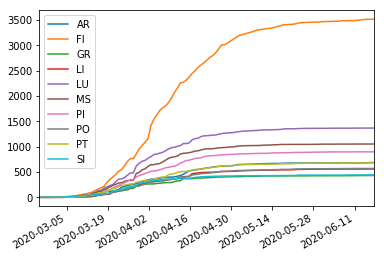

In [27]:
%matplotlib inline

myTS[list(myMI.loc['Toscana'].index)].plot()

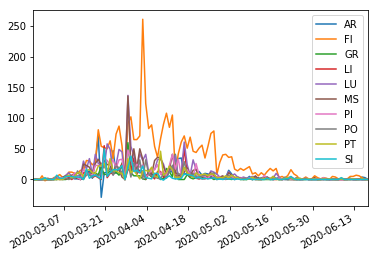

In [30]:
dailyincr[list(myMI.loc['Toscana'].index)].plot()

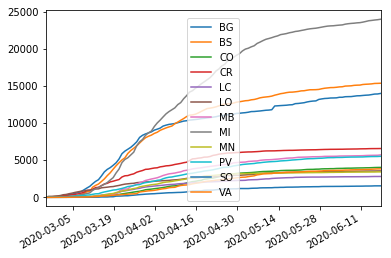

In [28]:
myTS[list(myMI.loc['Lombardia'].index)].plot()


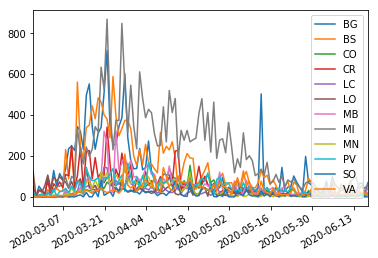

In [31]:
dailyincr[list(myMI.loc['Lombardia'].index)].plot()


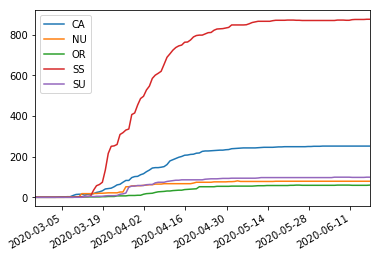

In [29]:
myTS[list(myMI.loc['Sardegna'].index)].plot()


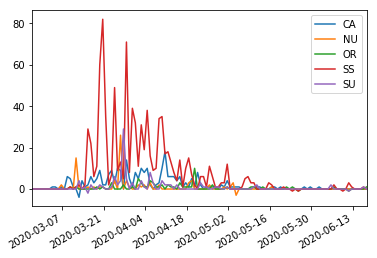

In [32]:
dailyincr[list(myMI.loc['Sardegna'].index)].plot()


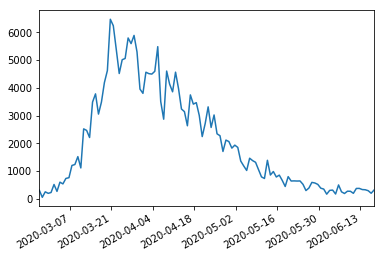

In [33]:
#Daily increase for Italy
dailyincr.sum(axis = 1).plot()

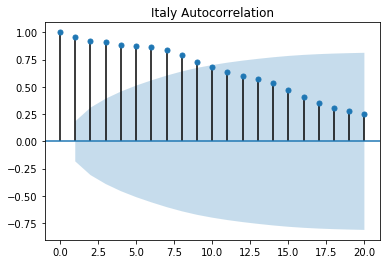

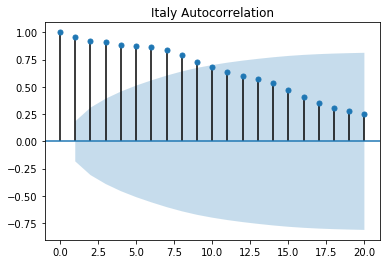

In [35]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#ACF plot for totals
plot_acf(dailyincr.sum(axis = 1), lags=20, unbiased = True, title = 'Italy Autocorrelation')

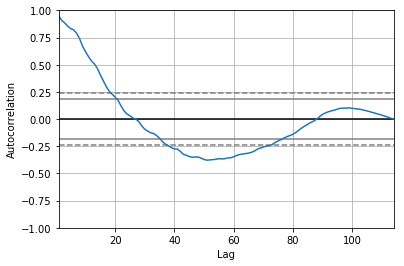

In [2]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(dailyincr.sum(axis = 1))
#dashed 99%, continous 95%


Deeper look to Regioni dataset; there are no fake data this time.
We can try to build a MultiIndex DataFrame with indices (data, regions).

In [4]:
with open('G:/Algoritmi e programmazione/Progetto/Dati/dpc-covid19-ita-regioni.json') as f:
         d = json.load(f) 

d2 = pd.DataFrame(d)


#Creating dataframe adding a row one by one

columns = ['data', 'denominazione_regione', 'deceduti', 'dimessi_guariti', 
           'isolamento_domiciliare', 'nuovi_positivi', 'ricoverati_con_sintomi',
           'tamponi', 'terapia_intensiva', 'totale_casi', 'totale_ospedalizzati',
           'totale_positivi', 'variazione_totale_positivi']
df = pd.DataFrame(index = range(len(d)), columns = columns)
for i in range(len(d)):
    riga = {}
    for n in range(len(columns)):
        riga[columns[n]] = d[i][columns[n]]
    df.loc[i] = riga 
    

In [27]:
df.data = pd.DatetimeIndex(df.data)
dates = list(set(df.data))
dates.sort()
regions = list(set(df.denominazione_regione))
regions.sort()
df.set_index(['data', 'denominazione_regione'], inplace = True) 
df = df.sort_index()


In [11]:
df.loc[dates[40]]['tamponi']


denominazione_regione
Abruzzo                     5
Basilicata                  0
Calabria                    2
Campania                   10
Emilia-Romagna            391
Friuli Venezia Giulia      89
Lazio                     124
Liguria                    39
Lombardia                3700
Marche                     21
Molise                      0
P.A. Bolzano                1
P.A. Trento                 3
Piemonte                  141
Puglia                      0
Sardegna                    1
Sicilia                     5
Toscana                   296
Umbria                      8
Valle d'Aosta               7
Veneto                   3780
Name: tamponi, dtype: object

In [12]:
df.loc[(dates[40], 'Toscana')]

deceduti                        0
dimessi_guariti                 0
isolamento_domiciliare          0
nuovi_positivi                  2
ricoverati_con_sintomi          2
tamponi                       296
terapia_intensiva               0
totale_casi                     2
totale_ospedalizzati            2
totale_positivi                 2
variazione_totale_positivi      2
Name: (2020-02-25 18:00:00, Toscana), dtype: object

Add two new attributes to DataFrame df, 'letalità' and 'nuovi_deceduti'

In [20]:
#Division by zero problem
letalità = list(np.repeat(np.nan, len(df.index)))
for i in range(len(df.index)):
    if df.iloc[i]['totale_casi'] != 0:
        letalità[i] = df.iloc[i]['deceduti'] / df.iloc[i]['totale_casi']
df['letalità'] = letalità


In [33]:
letal = {}
for d in dates:
    letal[d] = []
for i in df.index:
    letal[i[0]].append(df.loc[i]['letalità'])
letal = pd.DataFrame(letal).transpose()
letal.columns = regions


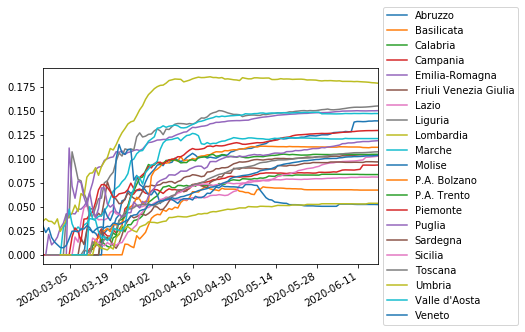

In [35]:
import matplotlib as mpl
%matplotlib inline
letal.plot(legend = False)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [36]:
nuovi_deceduti = list(np.repeat(np.nan, 21))
for i in range(21, len(df.index)):
    nuovi_deceduti.append(df.iloc[i]['deceduti'] - df.iloc[i-21]['deceduti'])

df['nuovi_deceduti'] = nuovi_deceduti